---
# Grocery Store Analysis

---
# Table of Contents:

- Product Performace Analysis
- Time Series Analysis
- Customer Segmentation
- Market Basket Analysis
- Campaign Result Analysis

---
# Import Library

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', 60)

---
# Load Data

In [137]:
df_customer = pd.read_excel('grocery_database.xlsx', sheet_name= 'customer_details')
df_transaction = pd.read_excel('grocery_database.xlsx', sheet_name= 'transactions', parse_dates= ['transaction_date'])
df_product_area = pd.read_excel('grocery_database.xlsx', sheet_name= 'product_areas')
df_campaign_data = pd.read_excel('grocery_database.xlsx', sheet_name= 'campaign_data')
df_loyalty_scores = pd.read_excel('grocery_database.xlsx', sheet_name= 'loyalty_scores')

**Data Understanding**

In [138]:
data_frame_name = []
list_column = []
column_dtype = []
n_missing_value = []
n_duplicate = []
value = []

data_frames = [df_customer, df_transaction, df_product_area, df_campaign_data, df_loyalty_scores]
data_frame_names = ['df_customer', 'df_transaction', 'df_product_area', 'df_campaign_data', 'df_loyalty_scores']

for df, df_name in zip(data_frames, data_frame_names):
    n_column = len(df.columns)
    for i in range(n_column):
        column_name = df.columns[i]
        d_type = df.dtypes[i]
        n_missing = df[column_name].isna().sum()
        duplicated = df.duplicated().sum()
        sample_value = df[column_name].unique()[:5]
        
        if d_type == 'datetime64[ns]':
            # Convert datetime values to string using strftime
            sample_value = df[column_name].dt.strftime('%Y-%m-%d').unique()[:5]
        
        data_frame_name.append(df_name) 
        list_column.append(column_name)
        column_dtype.append(d_type)
        n_missing_value.append(n_missing)
        n_duplicate.append(duplicated)
        value.append(sample_value)

df_overview = pd.DataFrame({
    'data_frame': data_frame_name,
    'column': list_column,
    'd_type': column_dtype,
    'n_missing_value': n_missing_value,
    'n_duplicate': n_duplicate,
    'sample_value': value
})

df_overview

,data_frame,column,d_type,n_missing_value,n_duplicate,sample_value
0,df_customer,customer_id,int64,0,0,"[74, 524, 607, 343, 322]"
1,df_customer,distance_from_store,float64,5,0,"[3.38, 4.76, 4.45, 0.91, 3.02]"
2,df_customer,gender,object,5,0,"[F, M, nan]"
3,df_customer,credit_score,float64,8,0,"[0.59, 0.52, 0.49, 0.54, 0.63]"
4,df_transaction,customer_id,int64,0,0,"[1, 2, 3, 4, 5]"
5,df_transaction,transaction_date,datetime64[ns],0,0,"[2020-04-10, 2020-06-02, 2020-06-10, 2020-06-19, 2020-07-02]"
6,df_transaction,transaction_id,int64,0,0,"[435657533999, 436189770685, 436265380298, 436352035866, 436488780919]"
7,df_transaction,product_area_id,int64,0,0,"[3, 2, 4, 1, 5]"
8,df_transaction,num_items,int64,0,0,"[7, 5, 4, 2, 6]"
9,df_transaction,sales_cost,float64,0,0,"[19.16, 7.71, 26.97, 38.52, 22.13]"


From the table above, we can observe that there are a few missing values in the 'distance_from_store', 'gender', and 'credit_score' columns of the 'df_customer' DataFrame. Apart from that, there are no duplicate records, and the data types of the respective columns appear to be appropriate.

For numerical data we will examine the data distribution of the columns with missing values before deciding on a method to handle them, as for gender we will use mode.

**Handling Missing Values**

In [139]:
df_customer[df_customer.isna().any(axis=1)]

,customer_id,distance_from_store,gender,credit_score
18,843,4.84,F,NaN
169,517,NaN,NaN,NaN
233,480,4.77,NaN,0.47
314,105,NaN,F,0.71
321,576,3.66,F,NaN
466,218,NaN,M,0.37
490,202,1.00,F,NaN
500,430,1.97,F,NaN
576,362,NaN,NaN,0.56
657,389,3.23,F,NaN


In [140]:
df_customer['gender'] = df_customer['gender'].fillna(value= df_customer['gender'].mode()[0])

In [141]:
df_customer.isna().sum()

customer_id            0
distance_from_store    5
gender                 0
credit_score           8
dtype: int64

Now 'gender' column has no missing value

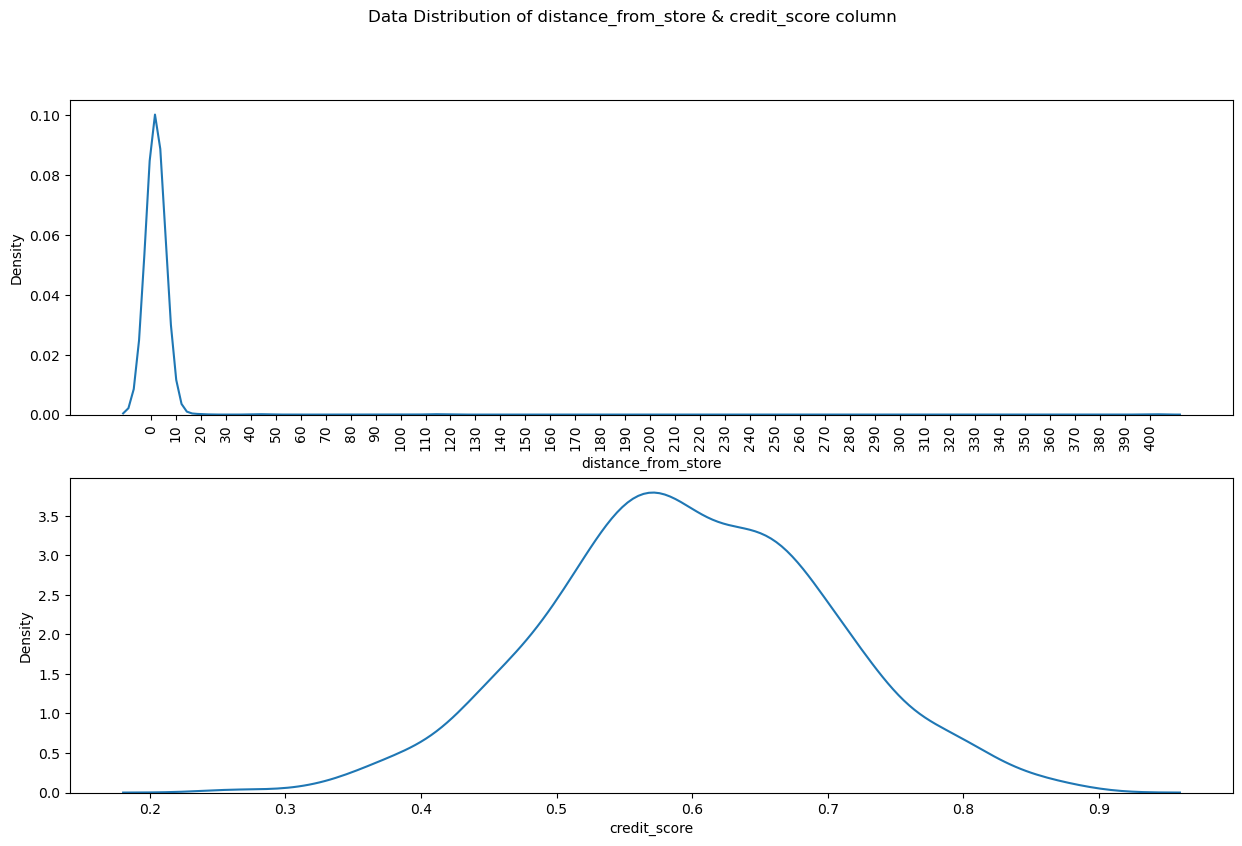

In [142]:
plt.figure(figsize= (15, 9))
plt.suptitle('Data Distribution of distance_from_store & credit_score column')

plt.subplot(2, 1, 1)
sns.kdeplot(df_customer['distance_from_store'])
plt.xticks(range(0, 401, 10), rotation= 90)

plt.subplot(2, 1, 2)
sns.kdeplot(df_customer['credit_score'])

plt.show()

Because the distribution is not normal, we will use the median to fill the missing values for these two columns. Additionally, for the 'distance_from_store' column, we will use the median within the range up to 10 miles, as that is where most of the data is concentrated.

In [143]:
df_customer['distance_from_store'] = df_customer['distance_from_store'].fillna(value= df_customer[df_customer['distance_from_store'] < 10]['distance_from_store'].median())

In [144]:
df_customer['credit_score'] = df_customer['credit_score'].fillna(value= df_customer['credit_score'].median())

In [145]:
df_customer.isna().sum()

customer_id            0
distance_from_store    0
gender                 0
credit_score           0
dtype: int64

Now that the data is clean, we can proceed to analyze the data. We will perform additional Exploratory Data Analysis (EDA) during the analysis if necessary.

---
# Product Performance Analysis

For this analysis, we need to merge df_transaction and df_product_area dataset. The merged dataset will be referred to as pp_analysis, where "pp" stands for product performance. Additionally, we will create a new table to calculate and store profit and profit per item values.

To obtain the profit, we will multiply the sales_cost column with the profit_margin column. Then, by dividing this value by num_items, we will calculate the profit per item.

In [146]:
display(
    'df_transaction', 
    df_transaction.head(1),
    'df_product_area',
    df_product_area.head(1)
    )

'df_transaction'

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16


'df_product_area'

,product_area_id,product_area_name,profit_margin
0,1,Non-Food,0.25


In [147]:
pp_analysis = df_transaction.merge(df_product_area, on= 'product_area_id', how= 'left').copy()

pp_analysis['revenue'] = pp_analysis['sales_cost'] + (pp_analysis['sales_cost'] * pp_analysis['profit_margin'])
pp_analysis['profit'] = pp_analysis['sales_cost'] * pp_analysis['profit_margin']

pp_analysis = pp_analysis[['customer_id', 'transaction_date', 'transaction_id', 'product_area_name', 'num_items', 'sales_cost', 'revenue', 'profit', 'profit_margin']]

pp_analysis = pp_analysis.round(2)

pp_analysis.head()

,customer_id,transaction_date,transaction_id,product_area_name,num_items,sales_cost,revenue,profit,profit_margin
0,1,2020-04-10,435657533999,Fruit,7,19.16,21.84,2.68,0.14
1,1,2020-04-10,435657533999,Vegetables,5,7.71,9.10,1.39,0.18
2,1,2020-06-02,436189770685,Dairy,4,26.97,32.09,5.12,0.19
3,1,2020-06-02,436189770685,Non-Food,2,38.52,48.15,9.63,0.25
4,1,2020-06-10,436265380298,Dairy,4,22.13,26.33,4.20,0.19


In [148]:
display(pp_analysis['transaction_date'].min(), pp_analysis['transaction_date'].max())

Timestamp('2020-04-01 00:00:00')

Timestamp('2020-09-30 00:00:00')

The dataset contains transactions from April 2020 to November 2020

In [149]:
pp_group = pp_analysis.groupby('product_area_name')[['num_items', 'sales_cost', 'profit', 'revenue',  'profit_margin']]\
    .agg({'num_items': 'sum', 'sales_cost': 'sum', 'profit': 'sum', 'revenue': 'sum', 'profit_margin': 'first'})\
    .reset_index()

pp_group

,product_area_name,num_items,sales_cost,profit,revenue,profit_margin
0,Dairy,33903,175792.77,33400.59,209193.45,0.19
1,Fruit,81476,252033.53,35284.63,287317.71,0.14
2,Meat,23145,240892.82,26498.60,267391.41,0.11
3,Non-Food,34396,747129.45,186782.55,933912.02,0.25
4,Vegetables,65458,133879.25,24098.04,157977.67,0.18


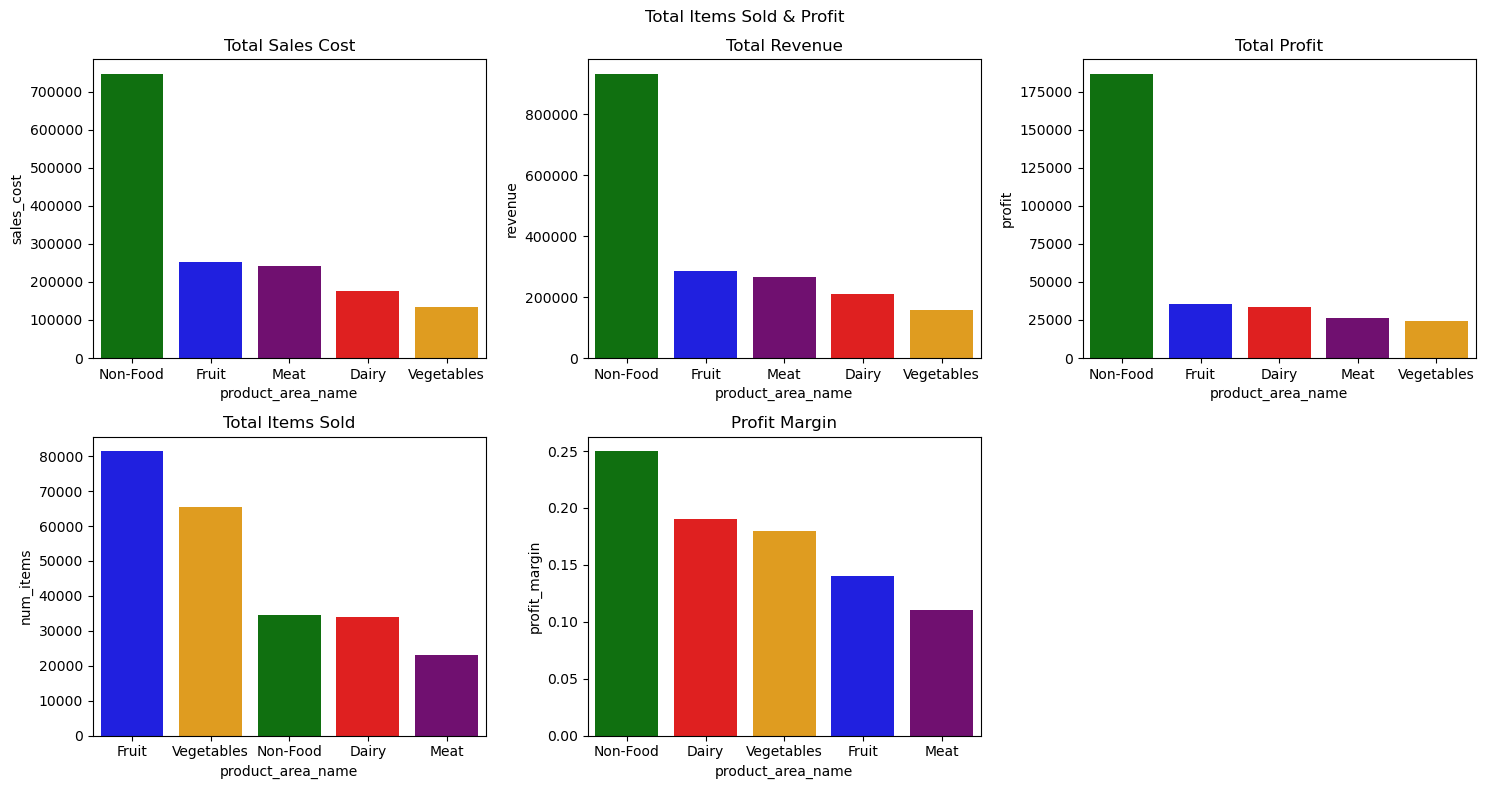

In [150]:
# Create a custom color mapping
product_area_colours = {
    'Fruit': 'blue',
    'Vegetables': 'orange',
    'Non-Food': 'green',
    'Dairy': 'red',
    'Meat': 'purple'
}

plt.figure(figsize=(15, 8))
plt.suptitle('Total Items Sold & Profit')

plt.subplot(2, 3, 1)
sns.barplot(
    data= pp_group.sort_values('sales_cost', ascending= False),
    x='product_area_name',
    y='sales_cost',
    palette=product_area_colours
)
plt.title('Total Sales Cost')

plt.subplot(2, 3, 2)
sns.barplot(
    data= pp_group.sort_values('revenue', ascending= False),
    x='product_area_name',
    y='revenue',
    palette=product_area_colours
)
plt.title('Total Revenue')

plt.subplot(2, 3, 3)
sns.barplot(
    data= pp_group.sort_values('profit', ascending= False),
    x='product_area_name',
    y='profit',
    palette=product_area_colours
)
plt.title('Total Profit')

plt.subplot(2, 3, 4)
sns.barplot(
    data= pp_group.sort_values('num_items', ascending= False),
    x='product_area_name',
    y='num_items',
    palette=product_area_colours
)
plt.title('Total Items Sold')

plt.subplot(2, 3, 5)
sns.barplot(
    data= pp_analysis.groupby('product_area_name')[['num_items', 'sales_cost', 'profit',  'profit_margin']].agg({'num_items': 'sum', 'sales_cost': 'sum', 'profit': 'sum', 'profit_margin': 'first'})\
        .sort_values('profit_margin', ascending= False).reset_index(),
    x='product_area_name',
    y='profit_margin',
    palette=product_area_colours
)
plt.title('Profit Margin')

plt.tight_layout()
plt.show()

Insight:
- Non-food products have the highest revenue of $933,911. Despite having the highest sales cost, it has the highest profit margin among all product categories.
- Fruit products have the highest number of items sold, but it has relatively low profit margin compared to other products.
- Meat products contribute significantly to the overall revenue, despite having the lowest profit margin and total number of items sold.
- Vegetable products contribute the lowest to the overall revenue, even though it has a substantial number of items sold and a moderate profit margin when compared to other products.
- Dairy products perform moderately with a high profit margin, but it has a relatively low number of items sold.

Recomendation:
- **Focus on High-Profit Margin Products**: Non-Food product stands out with the highest profit margin of 25%. Consider allocating more resources and marketing efforts to promote and sell these products. However, ensure that inventory management and pricing strategies are optimized to maintain the profit margin.

- **Optimize "Fruit" Product Sales**: While Fruit product has the highest revenue due to its higher sales volume, its profit margin of 14% is comparatively lower. Consider implementing strategies to increase the profit margin, such as negotiating better supplier deals, optimizing production costs, or offering higher-margin fruit varieties.

Overall, these recommendations aim to increase profitability by focusing on high performing products

---
# Time Series Analysis

### Monthly

In [151]:
monthly = pp_analysis.set_index('transaction_date').resample('M').sum()[['num_items', 'sales_cost', 'revenue', 'profit']]
monthly.index = monthly.index.strftime('%Y-%m')

monthly

,num_items,sales_cost,revenue,profit
transaction_date,,,,
2020-04,38211,238504.85,285324.88,46820.04
2020-05,37702,233906.47,279969.68,46063.25
2020-06,37221,231403.82,277077.33,45673.63
2020-07,42628,290462.78,348103.52,57640.66
2020-08,41584,281779.08,337463.61,55684.40
2020-09,41032,273670.82,327853.24,54182.43


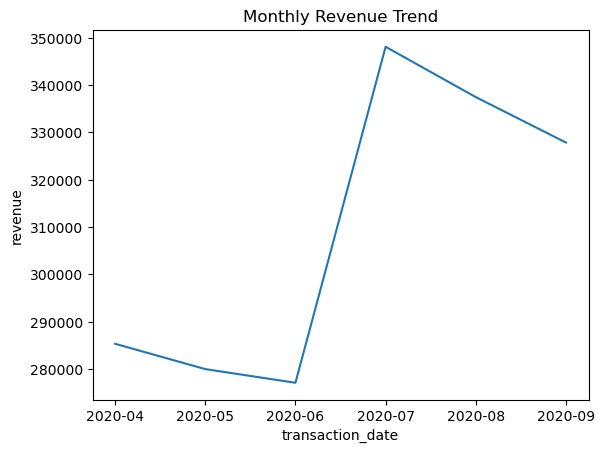

In [152]:
sns.lineplot(
    data= monthly,
    x= monthly.index,
    y= 'revenue'
)
plt.title('Monthly Revenue Trend')

plt.show()

Insight:

- There is an overall increasing trend in revenue from April to September, indicating positive growth for the business
- The significant spike in revenue in July could be attributed to the "delivery_club" campaign conducted during that month

### Weekly

In [153]:
weekly = pp_analysis.set_index('transaction_date').resample('W').agg({'customer_id': 'nunique', 'revenue': 'sum'}).rename(columns= {'customer_id': 'n_customer'})

weekly

,n_customer,revenue
transaction_date,,
2020-04-05,366,56533.13
2020-04-12,435,64934.59
2020-04-19,470,61997.16
2020-04-26,453,66016.81
2020-05-03,470,65642.64
2020-05-10,444,62055.34
2020-05-17,444,60643.30
2020-05-24,441,63150.70
2020-05-31,455,64320.89


In [154]:
def Week_of_month(date):
    week_number = (date.day - 1) // 7 + 1
    return week_number

In [155]:
weekly['week_of_month'] = weekly.index.to_series().apply(Week_of_month)

In [156]:
mean_weekly_revenue = weekly.groupby('week_of_month')[['revenue']].mean().sort_values('revenue', ascending= False).reset_index()
mean_weekly_revenue

,week_of_month,revenue
0,2,71490.588333
1,3,70031.388333
2,4,69883.920000
3,5,69736.735000
4,1,63983.344286


In [157]:
mean_customer_weekly = weekly.groupby('week_of_month')[['n_customer']].mean().astype('int').sort_values('n_customer', ascending= False).reset_index()
mean_customer_weekly

,week_of_month,n_customer
0,3,455
1,2,454
2,5,454
3,4,452
4,1,410


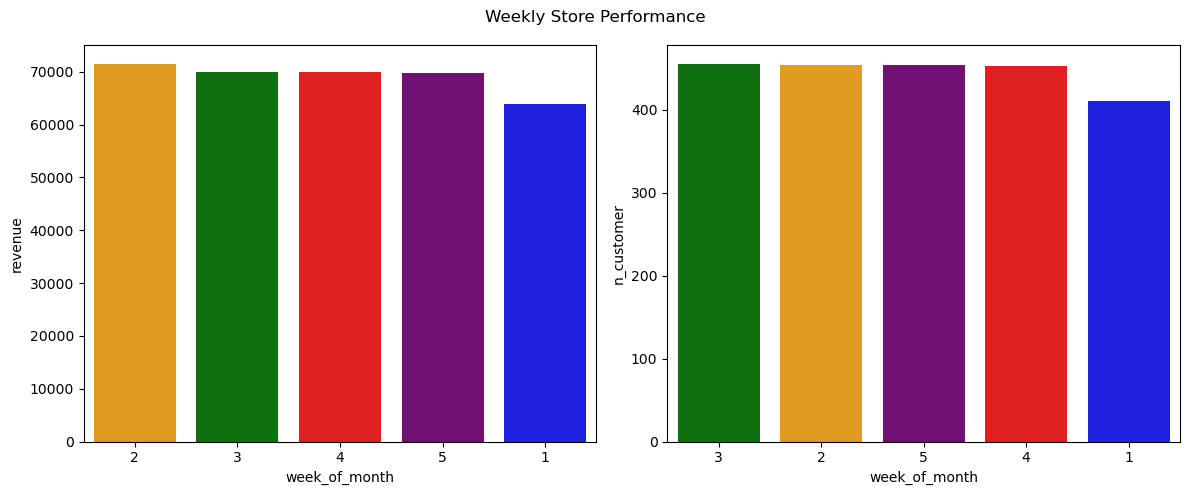

In [158]:
week_number_colour= {
    1: 'blue', 
    2: 'orange',
    3: 'green',
    4: 'red',
    5: 'purple'
}

plt.figure(figsize= (12, 5))
plt.suptitle('Weekly Store Performance')

plt.subplot(1, 2, 1)
sns.barplot(
    data= mean_weekly_revenue,
    x= 'week_of_month',
    y= 'revenue',
    order= mean_weekly_revenue['week_of_month'].to_list(),
    palette= week_number_colour
)

plt.subplot(1, 2, 2)
sns.barplot(
    data= mean_customer_weekly,
    x= 'week_of_month',
    y= 'n_customer',
    order= mean_customer_weekly['week_of_month'].to_list(),
    palette= week_number_colour
)

plt.tight_layout()
plt.show()

Insight:

The store generated the highest revenue in week 2 and the lowest revenue in week 1. Interestingly, despite week 5 having the fewest number of days because week 5 includes dates from 29th to the end of the month, it still generated a large revenue and ranked 3rd highest in terms of the number of customers.

Recommendation:

To maximize revenue and sales, it would be most beneficial to plan events or promotions between weeks 2 and 5. These weeks have shown to generate the highest revenue and the highest number of customers, making them ideal periods to attract more customers and boost overall sales performance.

### Daily

In [159]:
daily = pp_analysis.set_index('transaction_date').resample('D').agg({'customer_id': 'nunique', 'revenue': 'sum'}).rename(columns= {'customer_id': 'n_customer'})

daily

,n_customer,revenue
transaction_date,,
2020-04-01,79,11522.25
2020-04-02,87,10954.42
2020-04-03,98,10285.98
2020-04-04,107,12623.52
2020-04-05,98,11146.96
...,...,...
2020-09-26,87,11544.72
2020-09-27,87,14465.95
2020-09-28,97,11174.38


In [160]:
daily['day_name'] = daily.index.day_name()
daily

,n_customer,revenue,day_name
transaction_date,,,
2020-04-01,79,11522.25,Wednesday
2020-04-02,87,10954.42,Thursday
2020-04-03,98,10285.98,Friday
2020-04-04,107,12623.52,Saturday
2020-04-05,98,11146.96,Sunday
...,...,...,...
2020-09-26,87,11544.72,Saturday
2020-09-27,87,14465.95,Sunday
2020-09-28,97,11174.38,Monday


In [162]:
mean_daily_revenue = daily.groupby('day_name')[['revenue']].mean().sort_values('revenue', ascending= False)
mean_customer_daily = daily.groupby('day_name')[['n_customer']].mean().sort_values('n_customer', ascending= False)

In [163]:
mean_daily_revenue

,revenue
day_name,
Wednesday,10647.523704
Saturday,10497.984231
Friday,10434.979231
Sunday,10084.293077
Thursday,9875.574615
Monday,9812.657692
Tuesday,9614.092692


In [164]:
mean_customer_daily

,n_customer
day_name,
Wednesday,95.296296
Sunday,94.115385
Saturday,93.384615
Friday,92.846154
Tuesday,92.269231
Monday,92.115385
Thursday,89.346154


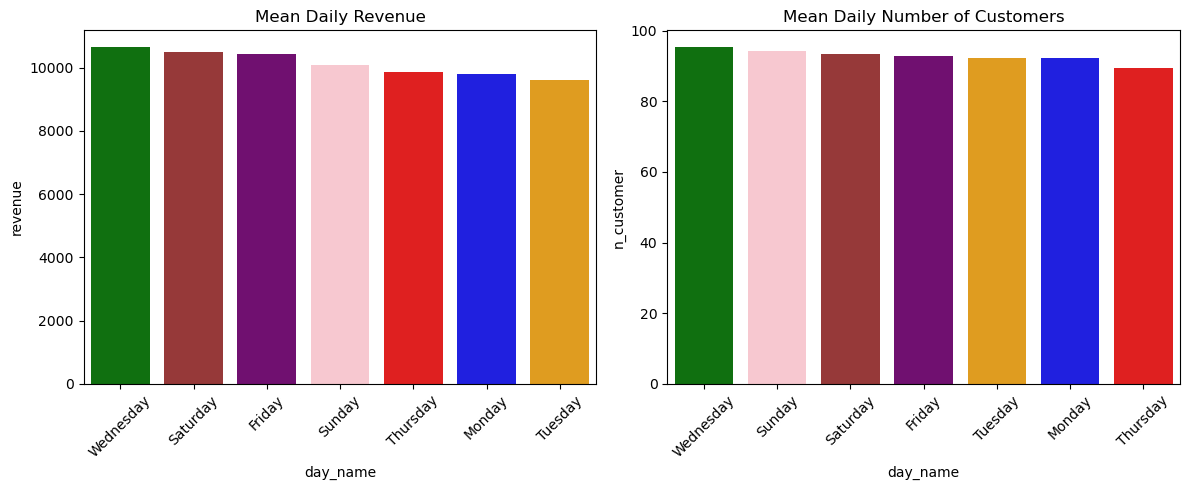

In [165]:
day_colour = {
    'Monday': 'blue', 
    'Tuesday': 'orange',
    'Wednesday': 'green',
    'Thursday': 'red',
    'Friday': 'purple',
    'Saturday': 'brown',  
    'Sunday': 'pink'      
}

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_daily_revenue_sorted = mean_daily_revenue.sort_values('revenue', ascending=False)
ax1 = sns.barplot(
    data=mean_daily_revenue_sorted.reset_index(),
    x='day_name',
    y='revenue',
    palette=[day_colour[day] for day in mean_daily_revenue_sorted.index]
)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)  
plt.title('Mean Daily Revenue')

plt.subplot(1, 2, 2)
mean_customer_daily_sorted = mean_customer_daily.sort_values('n_customer', ascending=False)
ax2 = sns.barplot(
    data=mean_customer_daily_sorted.reset_index(),
    x='day_name',
    y='n_customer',
    palette=[day_colour[day] for day in mean_customer_daily_sorted.index]
)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)  
plt.title('Mean Daily Number of Customers')

plt.tight_layout()
plt.show()


Insight:

> Revenue Analysis by Day:<br>
- Wednesday has the highest mean daily revenue, with an average of approximately $10,647
- Saturday and Friday also show strong performance in terms of daily revenue, with averages of around $10,497 and $10,434, respectively
- Tuesday has the lowest mean daily revenue, with an average of approximately $9,614

> Customer Engagement Analysis by Day:<br>
- Wednesday has the highest average number of customers per day, with approximately 95 customers
- Sunday and Saturday also have strong customer engagement, with averages of approximately 94 and 93 customers per day, respectively.
- Thursday has the lowest average number of customers per day, with approximately 89 customers

> Correlation between Revenue and Customer Engagement:<br>
There seems to be a positive correlation between daily revenue and the number of customers. Days with higher customer engagement tend to generate higher daily revenues.

---
# Customer Segmentation

In this section we will perform customer segmentation using RFM (Recency, Frequency, Monetary Value) metrics:

- Recency : How many days since last purchae
- Frequency : How many times a customer had transaction
- Monetary Value : Total revenue generated from this customer

Based on RFM metrics, we will segment the customer using K-Means Clustering algorithm

In [166]:
rfm = pp_analysis[['customer_id', 'transaction_date', 'transaction_id', 'revenue', 'product_area_name']]

rfm

,customer_id,transaction_date,transaction_id,revenue,product_area_name
0,1,2020-04-10,435657533999,21.84,Fruit
1,1,2020-04-10,435657533999,9.10,Vegetables
2,1,2020-06-02,436189770685,32.09,Dairy
3,1,2020-06-02,436189770685,48.15,Non-Food
4,1,2020-06-10,436265380298,26.33,Dairy
...,...,...,...,...,...
38501,870,2020-09-23,437316479610,57.29,Meat
38502,870,2020-09-23,437316479610,39.85,Vegetables
38503,870,2020-09-30,437385547544,26.04,Meat
38504,870,2020-09-30,437385547544,23.15,Non-Food


In [167]:
most_recent_date = pp_analysis['transaction_date'].max()

rfm = rfm.groupby('customer_id').agg({
    'transaction_date': 'max',
    'transaction_id': 'nunique',
    'revenue': 'sum',
    'product_area_name': lambda x: x.mode()[0]
})

rfm['transaction_date'] = rfm['transaction_date'].apply(lambda x: most_recent_date - x).dt.days

rfm.columns = ['recency', 'frequency', 'monetary', 'product_mode']
rfm['monetary'] = rfm['monetary'].round(2)

rfm

,recency,frequency,monetary,product_mode
customer_id,,,,
1,26,15,4835.39,Non-Food
2,5,23,2508.12,Non-Food
3,2,8,368.04,Meat
4,27,15,4278.56,Non-Food
5,10,23,7908.85,Fruit
...,...,...,...,...
866,8,38,1148.25,Meat
867,5,23,2753.47,Non-Food
868,7,15,2071.22,Vegetables


In [168]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 1 to 870
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recency       870 non-null    int64  
 1   frequency     870 non-null    int64  
 2   monetary      870 non-null    float64
 3   product_mode  870 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 34.0+ KB


In [169]:
rfm.describe()

,recency,frequency,monetary
count,870.000000,870.000000,870.000000
mean,12.080460,20.873563,2133.094552
std,16.982302,10.877289,2075.299501
min,0.000000,3.000000,37.870000
25%,2.000000,15.000000,1078.985000
50%,7.000000,23.000000,1737.835000
75%,15.000000,23.000000,2387.670000
max,158.000000,38.000000,12486.970000


In [170]:
rfm.columns[0:3]

Index(['recency', 'frequency', 'monetary'], dtype='object')

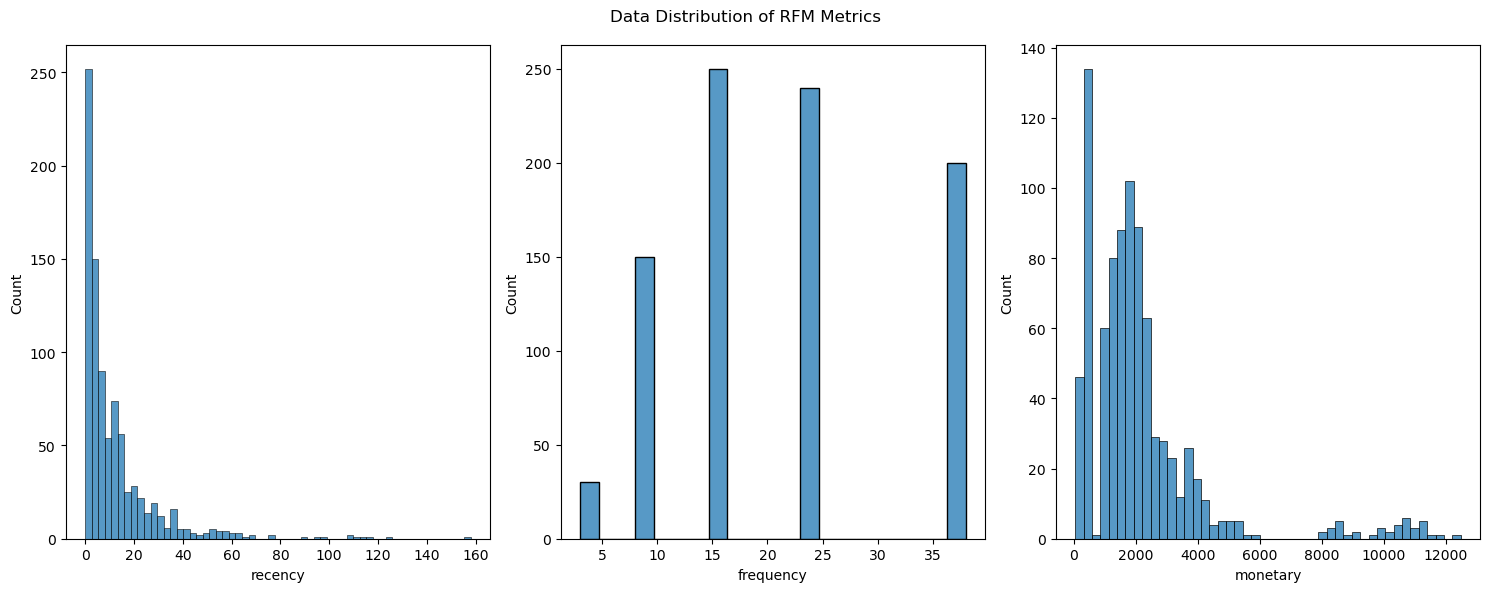

In [171]:
plt.figure(figsize= (15, 6))
plt.suptitle('Data Distribution of RFM Metrics')
for i, column in enumerate(rfm.columns[0:3], start= 1):
    plt.subplot(1, 3, i)
    sns.histplot(data= rfm[column])

plt.tight_layout()

The distribution is not normal, especially for recency and monetary column

## K-Means Clustering

In [172]:
from sklearn.cluster import KMeans

Define X

In [173]:
rfm.iloc[:, 0:3]

,recency,frequency,monetary
customer_id,,,
1,26,15,4835.39
2,5,23,2508.12
3,2,8,368.04
4,27,15,4278.56
5,10,23,7908.85
...,...,...,...
866,8,38,1148.25
867,5,23,2753.47
868,7,15,2071.22


In [174]:
X = rfm.iloc[:, 0:3].copy()

## Scaling 
We will use robust scaler becuase our data is skewed

In [175]:
from sklearn.preprocessing import RobustScaler

In [176]:
X = RobustScaler().fit_transform(X)

## Modeling

In [177]:
from sklearn.metrics import silhouette_score

In [178]:
list_n_cluster = range(2,10)

list_inertia = []
list_sil = []

for i in list_n_cluster:

    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(X)

    # inertia untuk elbow mwthod
    inertia = kmeans.inertia_
    list_inertia.append(inertia)

    # silhouette score
    sil = silhouette_score(X, kmeans.labels_)
    list_sil.append(sil)

df_cluster = pd.DataFrame({
    'n_cluster': list_n_cluster,
    'inertia': list_inertia,
    'sil_score': list_sil
})

df_cluster 

c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

,n_cluster,inertia,sil_score
0,2,3737.995965,0.621428
1,3,2365.256332,0.393670
2,4,1411.748488,0.509111
3,5,931.675369,0.540888
4,6,742.862080,0.549414
5,7,567.235234,0.527307
6,8,461.731522,0.535298
7,9,387.870742,0.544917


## Finding Best Number of Cluster

<Axes: xlabel='n_cluster', ylabel='sil_score'>

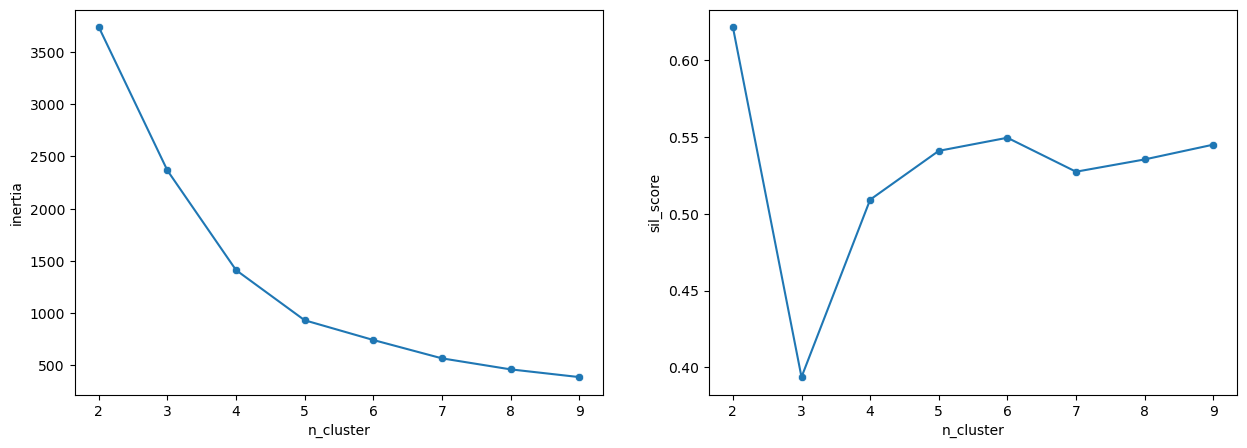

In [179]:
plt.figure(figsize= (15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data= df_cluster, x= 'n_cluster', y= 'inertia')
sns.scatterplot(data= df_cluster, x= 'n_cluster', y= 'inertia')

plt.subplot(1, 2, 2)
sns.lineplot(data= df_cluster, x= 'n_cluster', y= 'sil_score')
sns.scatterplot(data= df_cluster, x= 'n_cluster', y= 'sil_score')

There is no clear elbow that can be seen from the plot, however if we examine the table, the difference in inertia values becomes less significant from 4 clusters onwards. Based on the silhouette score, the optimal number of clusters is 4, as it has a relatively high score above 0.5. A silhouette score above 0.5 usually indicates reasonably well-defined clusters, where there are significant differences in characteristics between clusters.

The final decision on the number of clusters should also take into account business context, not just based on the evaluation of inertia and silhouette score. It is crucial to strike a balance between granularity and practicality, ensuring that the chosen number of clusters aligns with the company's marketing strategies and objective.

For this project we will use 4 clusters.

In [180]:
kmeans_4 = KMeans(n_clusters= 4, random_state= 0)
kmeans_4.fit(X)

cluster_4 = kmeans_4.labels_

rfm['cluster_4'] = cluster_4 + 1

rfm

c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\msi pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,recency,frequency,monetary,product_mode,cluster_4
customer_id,,,,,
1,26,15,4835.39,Non-Food,2
2,5,23,2508.12,Non-Food,2
3,2,8,368.04,Meat,2
4,27,15,4278.56,Non-Food,2
5,10,23,7908.85,Fruit,4
...,...,...,...,...,...
866,8,38,1148.25,Meat,3
867,5,23,2753.47,Non-Food,2
868,7,15,2071.22,Vegetables,2


In [181]:
rfm.groupby('cluster_4')[['recency', 'frequency', 'monetary']].mean()\
    .sort_values('monetary', ascending= False)

,recency,frequency,monetary
cluster_4,,,
4,7.250000,23.000000,10031.293750
2,9.096834,16.599628,2126.443389
3,3.845000,38.000000,1315.367050
1,49.096774,7.806452,532.978495


In [182]:
rfm.groupby('cluster_4').agg({'product_mode': lambda x: x.mode()[0]})

,product_mode
cluster_4,
1,Dairy
2,Non-Food
3,Dairy
4,Non-Food


## Insights and Recomendation:

**Cluster 4**: Recent purchases / High frequency / Highest monetary value
> Cluster 4 consists of the most valuable customers who have made recent and frequent purchases, contributing the most revenue for the business. The most bought product in this segment is non-food.

**Cluster 2**: Moderate purchases / Moderate frequency / Moderate monetary value
> Cluster 2 consists of customers who have made recent purchases and are moderately active compared to those in Cluster 4. They make purchases with a moderate frequency. The most bought product in this segment is non-food.

**Cluster 3**: Most recent purchases / Highest frequency / Low monetary value
> Cluster 3 comprises customers who make very recent and frequent purchases. Although their individual monetary value is lower compared to other clusters, they have a strong tendency to make purchases very recently. The most bought product in this segment is dairy.

**Cluster 1**: Highest recency / Lowest frequency / Lowest monetary value
> Cluster 1 consists of customers who have not made purchases recently and are less frequent spenders. Their individual monetary value is the lowest among the clusters, and they have the lowest frequency of buying. The most bought product in this segment is dairy.

Overall, the 4-cluster segmentation allows the company to better understand the diverse customer groups and formulate marketing strategies accordingly. By providing personalized experiences and targeted offers to each segment, the company can optimize customer retention and increase revenue gain from each customer group.

---
# Market Basket Analysis

We will be using apriori algorithm to do this analysis, the metric that we will be using are :
- Antecedents: 
>> Antecedents are the items that appear on the left-hand side of an association, their presence is used to predict the occurence of the consequents
- Consequents: 
>> Consequents are the items that appear on the right-hand side od an association, their presence indicate the items thar are likely to follow if the >> antecedents are present
- Support:
>> Proportion of transactions that contain both the antecedents and consequents
- Confidence:
>> Measures how often the rule has been found to be true
- Lift
>> Indicates the nature of the association (negative / neutral / positive) 
>> - lift < 0 = negative association, means that the presence of antecedents reduces the likelihood of the consequents
>> - lift = 0 = No association, means that the presence of antecedents and consequents are independent 
>> - lift > 0 = positive association, means that the presence of antecedents increase the likelihood of the consequents 

Measures how much more likely the consequents are given the 

In [183]:
# pip install mlxtend

In [184]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [185]:
pp_analysis

,customer_id,transaction_date,transaction_id,product_area_name,num_items,sales_cost,revenue,profit,profit_margin
0,1,2020-04-10,435657533999,Fruit,7,19.16,21.84,2.68,0.14
1,1,2020-04-10,435657533999,Vegetables,5,7.71,9.10,1.39,0.18
2,1,2020-06-02,436189770685,Dairy,4,26.97,32.09,5.12,0.19
3,1,2020-06-02,436189770685,Non-Food,2,38.52,48.15,9.63,0.25
4,1,2020-06-10,436265380298,Dairy,4,22.13,26.33,4.20,0.19
...,...,...,...,...,...,...,...,...,...
38501,870,2020-09-23,437316479610,Meat,4,51.61,57.29,5.68,0.11
38502,870,2020-09-23,437316479610,Vegetables,15,33.77,39.85,6.08,0.18
38503,870,2020-09-30,437385547544,Meat,3,23.46,26.04,2.58,0.11
38504,870,2020-09-30,437385547544,Non-Food,1,18.52,23.15,4.63,0.25


In [186]:
pp_analysis['product_area_name'].value_counts()

Fruit         8699
Vegetables    8473
Non-Food      7784
Dairy         7360
Meat          6190
Name: product_area_name, dtype: int64

## Create Basket

In [187]:
basket = pp_analysis.groupby(['customer_id', 'product_area_name'])['product_area_name'].count().unstack().fillna(0).reset_index()
basket = basket.drop(columns= 'customer_id')

basket.head()

product_area_name,Dairy,Fruit,Meat,Non-Food,Vegetables
0,11.0,7.0,9.0,13.0,11.0
1,10.0,7.0,8.0,18.0,9.0
2,2.0,1.0,5.0,0.0,4.0
3,9.0,7.0,8.0,14.0,9.0
4,21.0,22.0,22.0,22.0,19.0


## Encoding
To use apriori we have to encode the value of the item to binary value, if the item is bought we will encode it to 1 and if item is never bought we will encode it to 0.

In [188]:
basket = basket.applymap(lambda i: 0 if i == 0 else 1)
basket

product_area_name,Dairy,Fruit,Meat,Non-Food,Vegetables
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,0,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
865,1,1,1,0,1
866,1,1,1,1,1
867,1,1,1,1,1
868,1,1,1,1,1


## Generating Itemset

In [189]:
itemset = apriori(basket, use_colnames= True).sort_values('support', ascending= False)
itemset

c:\Users\msi pc\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
4,0.991954,(Vegetables)
1,0.991954,(Fruit)
11,0.985057,"(Fruit, Vegetables)"
0,0.880460,(Dairy)
8,0.872414,"(Vegetables, Dairy)"
5,0.872414,"(Fruit, Dairy)"
16,0.865517,"(Fruit, Vegetables, Dairy)"
2,0.763218,(Meat)
6,0.758621,"(Meat, Dairy)"
9,0.756322,"(Fruit, Meat)"


## Creating Association Rules

In [190]:
rules= association_rules(itemset, metric= 'lift', min_threshold= 1).sort_values('lift', ascending= False)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

rules.head(10)

,antecedents,consequents,support,confidence,lift
26,"(Vegetables, Meat)","(Fruit, Dairy)",0.745977,0.986322,1.130567
27,"(Vegetables, Dairy)","(Fruit, Meat)",0.745977,0.855072,1.130567
24,"(Fruit, Meat)","(Vegetables, Dairy)",0.745977,0.986322,1.130567
25,"(Fruit, Dairy)","(Vegetables, Meat)",0.745977,0.855072,1.130567
30,(Meat),"(Fruit, Vegetables, Dairy)",0.745977,0.977410,1.129278
21,"(Fruit, Vegetables, Dairy)",(Meat),0.745977,0.861886,1.129278
10,(Meat),"(Vegetables, Dairy)",0.751724,0.984940,1.128982
13,"(Fruit, Dairy)",(Meat),0.751724,0.861660,1.128982
14,(Meat),"(Fruit, Dairy)",0.751724,0.984940,1.128982
9,"(Vegetables, Dairy)",(Meat),0.751724,0.861660,1.128982


We will use the first entry for example how to read the result

- Antecedents : Vegetables, Meat
- Consequents : Fruit, Dairy
- Support: 0.745
>> 74.5% transactions contain both (Vegetables, Meat) and (Fruit, Dairy)
- Confidence : 0.986
>> When (Vegetables, Meat) is bought (Fruit, Dairy) is bought as well 98% of the time
- Lift : 1.13
>> Lift of 1.13 indicates positive association, where (Fruit, Dairy) is 1.13 more likely to be bought by the costumers where (Vegetables, Meat) is bought

Overall the result has high confidence but low lift value, this indicate a reliable predictive relationship between items, but the strength of the association is not significantly greater than random chances.

This can be due to the nature of this dataset, where the item contains general product categories not a specific items.

---
# Campaign Result Analysis

In [191]:
df_campaign_data

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag
0,74,delivery_club,2020-07-01,Mailer1,1
1,524,delivery_club,2020-07-01,Mailer1,1
2,607,delivery_club,2020-07-01,Mailer2,1
3,343,delivery_club,2020-07-01,Mailer1,0
4,322,delivery_club,2020-07-01,Mailer2,1
...,...,...,...,...,...
865,372,delivery_club,2020-07-01,Mailer2,1
866,104,delivery_club,2020-07-01,Mailer1,1
867,393,delivery_club,2020-07-01,Mailer2,1
868,373,delivery_club,2020-07-01,Control,0


In this campaign there are two groups: the control group and the test group. The test group consists of Mailer 1 and Mailer 2. Mailer 1 is a basic and cost-effective mail, while Mailer 2 is constructed with high-quality, colorful cardboard.

We will conduct a two-step test for this analysis. First, we will use a chi-square test to assess if there is any association between the test group (Mailer 1 and Mailer 2) and the control group (Mailer 3) in terms of sign-up rate. Afterward, we will perform a z-test between Mailer 1 and Mailer 2 to determine if there is a significant difference in sign-up rates.

## Chi-Square Test

In [192]:
Ho = 'There is no relationship between treatment group and sign-up rate, they are independent'
Ha = 'There is a relationship between treatment group and sign-up rate, they are not independent'

In [193]:
def Grouper(row):
    if row['mailer_type'] == 'Mailer1' or row['mailer_type'] == 'Mailer2':
        return 'Test'
    else:
        return 'Control'

In [194]:
df_campaign_data['Group'] = df_campaign_data.apply(Grouper, axis= 1)
df_campaign_data

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag,Group
0,74,delivery_club,2020-07-01,Mailer1,1,Test
1,524,delivery_club,2020-07-01,Mailer1,1,Test
2,607,delivery_club,2020-07-01,Mailer2,1,Test
3,343,delivery_club,2020-07-01,Mailer1,0,Test
4,322,delivery_club,2020-07-01,Mailer2,1,Test
...,...,...,...,...,...,...
865,372,delivery_club,2020-07-01,Mailer2,1,Test
866,104,delivery_club,2020-07-01,Mailer1,1,Test
867,393,delivery_club,2020-07-01,Mailer2,1,Test
868,373,delivery_club,2020-07-01,Control,0,Control


In [195]:
treatment_pivot = df_campaign_data.pivot_table(
    columns= 'signup_flag',
    index= 'Group',
    aggfunc= 'size'
)

treatment_pivot['Total'] = treatment_pivot.sum(axis= 1)
treatment_pivot.loc['Total'] = treatment_pivot.sum(axis= 0)

treatment_pivot

signup_flag,0,1,Total
Group,,,
Control,140,19,159
Test,461,250,711
Total,601,269,870


In [196]:
print(f'''Control sign-up rate : {round((19 / 159) * 100, 2)}%
Test sign-up rate    : {round((250/711) * 100, 2)}%
''')

Control sign-up rate : 11.95%
Test sign-up rate    : 35.16%



In [197]:
treatment_pivot.iloc[:2, :2]

signup_flag,0,1
Group,,
Control,140,19
Test,461,250


In [198]:
from scipy.stats import chi2_contingency

stat, pvalue, dof, expected = chi2_contingency(treatment_pivot.iloc[:2, :2])
pvalue

1.79868789769882e-08

Conclusion

In [199]:
if pvalue > 0.05:
    print(f'''pvalue = {pvalue}
{Ho}
''')
else:
    print(f'''pvalue = {pvalue}
{Ha}
''')

pvalue = 1.79868789769882e-08
There is a relationship between treatment group and sign-up rate, they are not independent



## Z-Test
From the chi-square test we know that treatment and sign-up rate is not independent, so we can proceed to the second test to see if there is any significant difference between mailer.

In [200]:
Ho = 'There is no significant difference in sign-up rates between Mailer1 and Mailer2'
Ha = 'Sign-up rates of Mailer2 is larger than Mailer1'

In [201]:
df_campaign_data

,customer_id,campaign_name,campaign_date,mailer_type,signup_flag,Group
0,74,delivery_club,2020-07-01,Mailer1,1,Test
1,524,delivery_club,2020-07-01,Mailer1,1,Test
2,607,delivery_club,2020-07-01,Mailer2,1,Test
3,343,delivery_club,2020-07-01,Mailer1,0,Test
4,322,delivery_club,2020-07-01,Mailer2,1,Test
...,...,...,...,...,...,...
865,372,delivery_club,2020-07-01,Mailer2,1,Test
866,104,delivery_club,2020-07-01,Mailer1,1,Test
867,393,delivery_club,2020-07-01,Mailer2,1,Test
868,373,delivery_club,2020-07-01,Control,0,Control


In [202]:
mailer_pivot = df_campaign_data.loc[df_campaign_data['mailer_type'] != 'Control'].pivot_table(
    columns= 'signup_flag',
    index= 'mailer_type',
    aggfunc= 'size'
)

mailer_pivot['Total'] = mailer_pivot.sum(axis= 1)
mailer_pivot.loc['Total'] = mailer_pivot.sum(axis= 0)

mailer_pivot

signup_flag,0,1,Total
mailer_type,,,
Mailer1,252,123,375
Mailer2,209,127,336
Total,461,250,711


In [203]:
m1_signup = mailer_pivot.loc['Mailer1', 1]
m2_signup = mailer_pivot.loc['Mailer2', 1]
m1_total = mailer_pivot.loc['Mailer1', 'Total']
m2_total = mailer_pivot.loc['Mailer2', 'Total']

In [204]:
print(f'''Mailer1 sign-up rate : {round((m1_signup / m1_total) * 100, 2)}%
Mailer2 sign-up rate : {round((m2_signup / m2_total) * 100, 2)}%
''')

Mailer1 sign-up rate : 32.8%
Mailer2 sign-up rate : 37.8%



In [205]:
from statsmodels.stats.proportion import proportions_ztest

stat, pvalue = proportions_ztest(
    count= [m2_signup, m1_signup],
    nobs= [m2_total, m1_total],
    alternative= 'larger'
)

pvalue

0.08175576111699284

In [206]:
if pvalue > 0.05:
    print(f'''pvalue = {pvalue}
{Ho}
''')
else:
    print(f'''pvalue = {pvalue}
{Ha}
''')

pvalue = 0.08175576111699284
There is no significant difference in sign-up rates between Mailer1 and Mailer2



## AB Testing Conclusion

From AB Testing we can conclude that the campaign is succesfully increase the sign-up rate, but we can not proof that there is a significant difference between the sign-up rate of Mailer 1 and Mailer 2.

## Recomendation

It is more benneficial to use Mailer 1, not only because it is more cost effective but also because there is no significant difference in sign-up rates between Mailer 1 and Mailer 2